### Student Details

Student name: Mithun Thakkar

Student ID:20017138

# Option 1: Logistic Regression and Multi-Class with scikit-learn

In [1]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt

In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

## Part 1: Adapting the Adaline Class

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [2]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) + 
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

In [3]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.activation(self.net_input(X))
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output))) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        return 1/(1+np.exp(-np.clip(z, a_min = -250, a_max = 250)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
        
        

In [4]:
from plot_decision_boundary import plot_decision_boundary

Reading the Iris-setosa and Iris-versicolor, sepal length and petal length

In [5]:
import pandas as pd
df = pd.read_csv('iris_data.csv', header=0)

# setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# sepal length and petal length
X = df.iloc[0:100, [0,2]].values

Train the algorithm based on the logisticregression class created above and plotting the Logistic cost per epoch of training

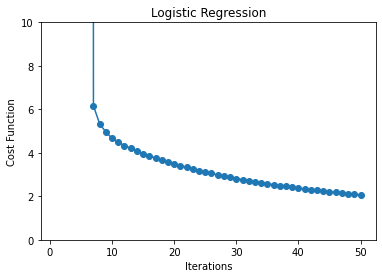

In [15]:
clf = LogisticRegressionGD(epochs = 50).train(X, y)
plt.plot(range(1, len(clf.cost_)+1), clf.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.title('Logistic Regression')
plt.ylim(0,10)
plt.show()


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 42)

<IPython.core.display.Javascript object>

Plotting the decision boundary using the supplied plot_decision_boundary function

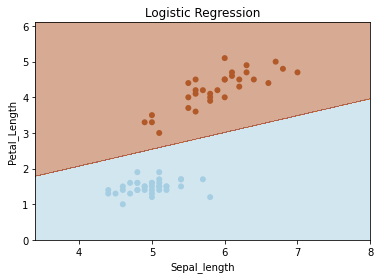

In [10]:
plot_decision_boundary(X_train, y_train, clf)
plt.xlabel("Sepal_length")
plt.ylabel("Petal_Length")
plt.title("Logistic Regression")
plt.show()